<a href="https://colab.research.google.com/github/zachfreitas/ADS_504_Machine_Learning/blob/main/Module_1/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1.1 Exercises
Zachariah Freitas

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Save this file here Module_1/Assignment_1.ipynb

## 1.1. Predicting Student Recommendation:
1.1.1. Download the student_records.csv file (located in your assignment prompt in Blackboard). <br>
1.1.2. Run all codes on the example in the lecture, Textbook 1 – Chapter 1: Page 19-28 and Page 55-64. The goal is to build a predictive model based on the dataset. The model can predict for any future student if they will be recommended for the grant based on their performance attributes. <br>
1.1.3. Write down your understanding about the codes and each part’s functioning.



In [ ]:
# Copy of data in my github for perputuity. 
sr_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_1/student_records.csv')

In [ ]:
sr_df.columns

Index(['Name', 'OverallGrade', 'Obedient', 'ResearchScore', 'ProjectScore',
       'Recommend'],
      dtype='object')

In [ ]:
sr_df.head()

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No


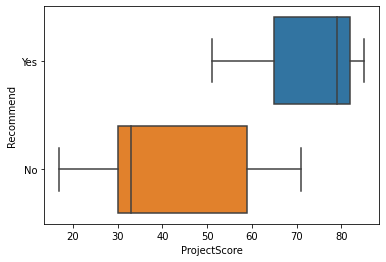

In [ ]:
ProjectScore = sns.boxplot(x="ProjectScore", y="Recommend", data = sr_df, orient = 'horizontal')
plt.show()

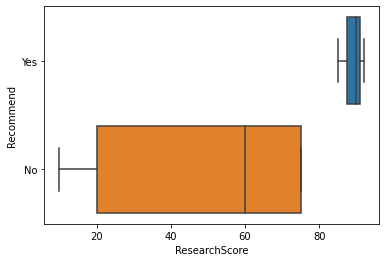

In [ ]:
ResearchScore = sns.boxplot(x="ResearchScore", y="Recommend", data = sr_df, orient = 'horizontal')
plt.show()

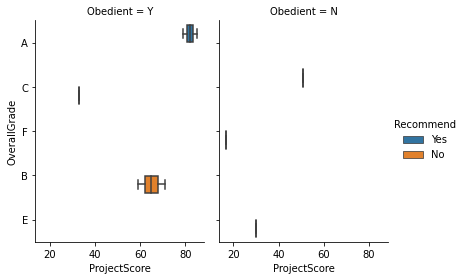

In [ ]:
g = sns.catplot(x="ProjectScore", y="OverallGrade",
                hue="Recommend", col="Obedient",
                data=sr_df, kind="box",
                height=4, aspect=.7);

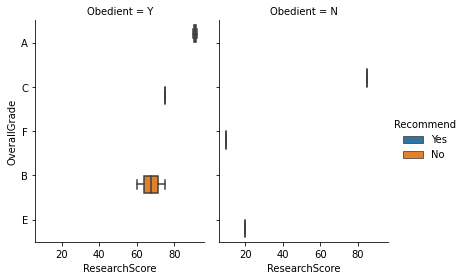

In [ ]:
g = sns.catplot(x="ResearchScore", y="OverallGrade",
                hue="Recommend", col="Obedient",
                data=sr_df, kind="box",
                height=4, aspect=.7);

## 1.2. Introducing the Python Machine Learning Ecosystem:
1.2.1. Download the simplemaps-worldcities-basic.csv file (located in your assignment prompt in Blackboard). <br>
1.2.2. Run all codes on the example in the lecture, Textbook 1 – Chapter 2: Page 75-112. The goal is to build a predictive model based on the dataset. The model can predict for any future student if they will be recommended for the grant based on their performance attributes. <br>
1.2.3. Write down your understanding about the codes and each part’s functioning. <br>


In [ ]:
# Copy of data in my github for perputuity. 
wc_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_1/simplemaps-worldcities-basic.csv')

## 1.3. Recommending Movies:
1.3.1. Load the MovieLens dataset from Tensorflow Datasets (movielens/100k_ratings and movielens/100k_movies). <br>
1.3.2. Follow the same steps in 1.2 and build a prediction model. <br>


In [2]:
import tensorflow_datasets as tfds

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [24]:
# https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb

ds = tfds.load('movielens/100k-ratings', split='train')
ds = ds.take(1)

for image, label in tfds.as_numpy(ds):
  print(type(image), type(label), label)

ValueError: ignored

In [37]:
# Load the MovieLens 100K data.
ratings = tfds.load(
    "movielens/100k-ratings",
    split="train"
)

# Get the ratings data.
ratings = (ratings
           # Retain only the fields we need.
           .map(lambda x: {"user_id": x["user_id"], "movie_title": x["movie_title"]})
           # Cache for efficiency.
           .cache(tempfile.NamedTemporaryFile().name)
)

# Get the movies data.
movies = tfds.load("movielens/100k-movies", split="train")
movies = (movies
          # Retain only the fields we need.
          .map(lambda x: x["movie_title"])
          # Cache for efficiency.
          .cache(tempfile.NamedTemporaryFile().name))

In [30]:
movies

<CacheDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [35]:
x = tfds.as_dataframe(movies)
x.head()

,
0,b'You So Crazy (1994)'
1,b'Love Is All There Is (1996)'
2,b'Fly Away Home (1996)'
3,b'In the Line of Duty 2 (1987)'
4,"b'Niagara, Niagara (1997)'"


In [38]:
y = tfds.as_dataframe(ratings)
y.head()

KeyboardInterrupt: ignored

In [1]:
import os
import pandas as pd
from mxnet import gluon, np
from d2l import mxnet as d2l

In [2]:
#@save
d2l.DATA_HUB['ml-100k'] = (
    'https://files.grouplens.org/datasets/movielens/ml-100k.zip',
    'cd4dcac4241c8a4ad7badc7ca635da8a69dddb83')

#@save
def read_data_ml100k():
    data_dir = d2l.download_extract('ml-100k')
    names = ['user_id', 'item_id', 'rating', 'timestamp']
    data = pd.read_csv(os.path.join(data_dir, 'u.data'), '\t', names=names,
                       engine='python')
    num_users = data.user_id.unique().shape[0]
    num_items = data.item_id.unique().shape[0]
    return data, num_users, num_items

In [3]:
data, num_users, num_items = read_data_ml100k()
sparsity = 1 - len(data) / (num_users * num_items)
print(f'number of users: {num_users}, number of items: {num_items}')
print(f'matrix sparsity: {sparsity:f}')
print(data.head(5))

number of users: 943, number of items: 1682
matrix sparsity: 0.936953
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [4]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

     |████████████████████████████████| 85 kB 2.7 MB/s 
     |████████████████████████████████| 4.3 MB 3.7 MB/s 
     |████████████████████████████████| 98 kB 7.5 MB/s 


In [5]:
import os
import pprint
import tempfile

from typing import Dict, Text

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs

In [ ]:
"movielens/100k_movies"

In [6]:
ratings = tfds.load("movielens/100k-ratings", split="train")

ratings = ratings.map(lambda x: {
    "movie_title": x["movie_title"],
    "user_id": x["user_id"],
    "user_rating": x["user_rating"]
})

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/movielens/100k-ratings/0.1.1.incomplete1Y7G5Y/movielens-train.tfrecord*...:   …

Dataset movielens downloaded and prepared to ~/tensorflow_datasets/movielens/100k-ratings/0.1.1. Subsequent calls will reuse this data.


In [7]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

In [8]:
movie_titles = ratings.batch(1_000_000).map(lambda x: x["movie_title"])
user_ids = ratings.batch(1_000_000).map(lambda x: x["user_id"])

unique_movie_titles = np.unique(np.concatenate(list(movie_titles)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

In [9]:
class RankingModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    embedding_dimension = 32

    # Compute embeddings for users.
    self.user_embeddings = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_ids, mask_token=None),
      tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
    ])

    # Compute embeddings for movies.
    self.movie_embeddings = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_movie_titles, mask_token=None),
      tf.keras.layers.Embedding(len(unique_movie_titles) + 1, embedding_dimension)
    ])

    # Compute predictions.
    self.ratings = tf.keras.Sequential([
      # Learn multiple dense layers.
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      # Make rating predictions in the final layer.
      tf.keras.layers.Dense(1)
  ])
    
  def call(self, inputs):

    user_id, movie_title = inputs

    user_embedding = self.user_embeddings(user_id)
    movie_embedding = self.movie_embeddings(movie_title)

    return self.ratings(tf.concat([user_embedding, movie_embedding], axis=1))

In [10]:
task = tfrs.tasks.Ranking(
  loss = tf.keras.losses.MeanSquaredError(),
  metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [11]:
class MovielensModel(tfrs.models.Model):

  def __init__(self):
    super().__init__()
    self.ranking_model: tf.keras.Model = RankingModel()
    self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
      loss = tf.keras.losses.MeanSquaredError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

  def call(self, features: Dict[str, tf.Tensor]) -> tf.Tensor:
    return self.ranking_model(
        (features["user_id"], features["movie_title"]))

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    labels = features.pop("user_rating")
    
    rating_predictions = self(features)

    # The task computes the loss and the metrics.
    return self.task(labels=labels, predictions=rating_predictions)

In [12]:
model = MovielensModel()
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

In [13]:
cached_train = train.shuffle(100_000).batch(8192).cache()
cached_test = test.batch(4096).cache()

In [14]:
model.fit(cached_train, epochs=3)

Epoch 1/3
10/10 [==============================] - 5s 68ms/step - root_mean_squared_error: 2.1126 - loss: 4.1097 - regularization_loss: 0.0000e+00 - total_loss: 4.1097
Epoch 2/3
10/10 [==============================] - 0s 46ms/step - root_mean_squared_error: 1.1301 - loss: 1.2795 - regularization_loss: 0.0000e+00 - total_loss: 1.2795
Epoch 3/3
10/10 [==============================] - 0s 44ms/step - root_mean_squared_error: 1.1211 - loss: 1.2588 - regularization_loss: 0.0000e+00 - total_loss: 1.2588


In [15]:
model.evaluate(cached_test, return_dict=True)

5/5 [==============================] - 4s 22ms/step - root_mean_squared_error: 1.1161 - loss: 1.2406 - regularization_loss: 0.0000e+00 - total_loss: 1.2406


{'loss': 1.2182104587554932,
 'regularization_loss': 0,
 'root_mean_squared_error': 1.1161020994186401,
 'total_loss': 1.2182104587554932}